In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\91909\Desktop\baseball regression project\baseball.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

<Axes: xlabel='Salary', ylabel='Count'>

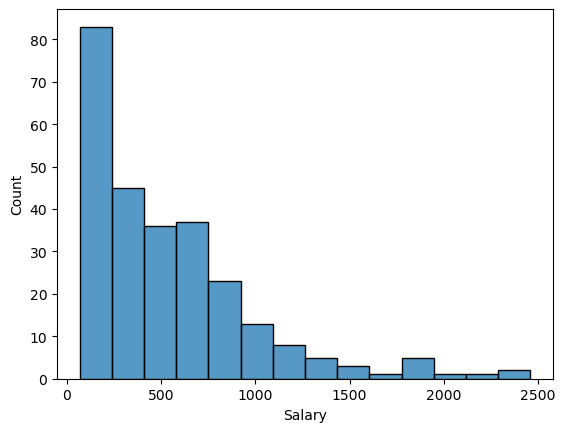

In [4]:
sns.histplot(df['Salary'])

##### right skewed target variable , needs to be transformed 

In [6]:
# df['Salary']=df['Salary'].apply(lambda x:np.log(x))

<Axes: xlabel='Salary', ylabel='Count'>

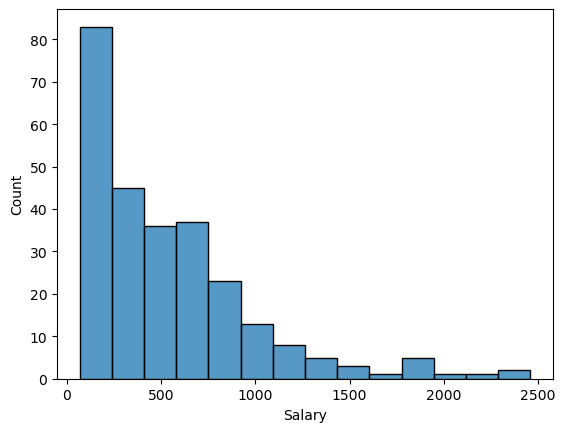

In [7]:
sns.histplot(df['Salary'])

<Axes: >

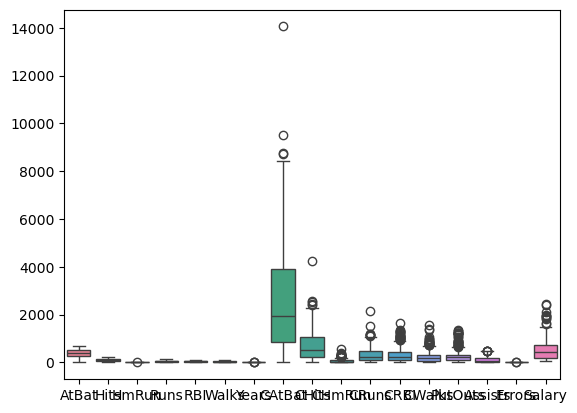

In [8]:
sns.boxplot(df)

In [9]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

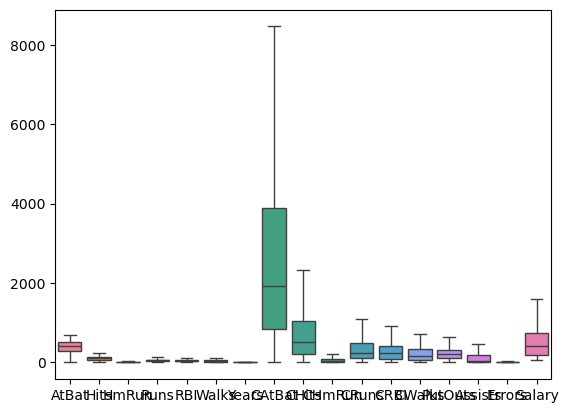

In [10]:
sns.boxplot(df)

In [11]:
# #Employee Numeric columns
df_num = df.select_dtypes(include=[np.number])
df_num.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,315,81,7.0,24,38,39,14,3449.0,835,69.00,321.0,414.0,375.0,632,43,10,475.0
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.0,263.0,636,82,14,480.0
2,496,141,20.0,65,78,37,11,5628.0,1575,208.75,828.0,838.0,354.0,200,11,3,500.0


In [12]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head(3)

,League,Division,NewLeague
0,N,W,N
1,A,W,A
2,N,E,N


In [13]:
from sklearn.preprocessing import LabelEncoder

df_cat = df_cat.apply(LabelEncoder().fit_transform)
df_cat.head(3)


,League,Division,NewLeague
0,1,1,1
1,0,1,0
2,1,0,1


In [14]:
df_final = pd.concat([df_num,df_cat],axis=1)
df_final.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League,Division,NewLeague
0,315,81,7.0,24,38,39,14,3449.0,835,69.00,321.0,414.0,375.0,632,43,10,475.0,1,1,1
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.0,263.0,636,82,14,480.0,0,1,0
2,496,141,20.0,65,78,37,11,5628.0,1575,208.75,828.0,838.0,354.0,200,11,3,500.0,1,0,1
3,321,87,10.0,39,42,30,2,396.0,101,12.00,48.0,46.0,33.0,636,40,4,91.5,1,0,1
4,594,169,4.0,74,51,35,11,4408.0,1133,19.00,501.0,336.0,194.0,282,421,25,750.0,0,1,0


In [15]:
x = df_final.drop('Salary', axis= 1)
y = df_final[['Salary']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.7 ,random_state=125)

In [16]:
train=pd.concat([xtrain,ytrain],axis=1)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
248,127,32,4.0,14,25,12,19,8396.0,2317,208.75,1048.0,918.75,714.75,167,18,6,1,1,1,500.0
117,151,41,4.0,26,21,19,2,288.0,68,9.00,45.0,39.00,35.00,28,56,2,0,1,0,95.0
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.00,263.00,636,82,14,0,1,0,480.0
3,321,87,10.0,39,42,30,2,396.0,101,12.00,48.0,46.00,33.00,636,40,4,1,0,1,91.5
37,457,101,14.0,42,63,22,17,6521.0,1767,208.75,1003.0,918.75,619.00,389,39,4,0,1,0,875.0


In [17]:
test=pd.concat([xtest,ytest],axis=1)
test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
135,591,184,20.0,83,79,38,5,1689.0,462,40.00,219.0,195.00,82.00,303,12,5,1,1,1,630.0
36,526,146,13.0,71,70,84,6,2648.0,715,77.00,352.0,342.00,289.00,303,9,9,1,1,1,815.0
152,491,141,11.0,77,47,37,15,4291.0,1240,84.00,615.0,430.00,340.00,239,8,2,0,0,0,525.0
109,663,200,29.0,108,121,32,4,1447.0,404,57.00,210.0,222.00,68.00,241,8,6,0,0,0,250.0
49,585,139,31.0,93,94,62,17,7546.0,1982,208.75,1085.5,918.75,714.75,0,0,0,0,0,0,950.0


In [18]:
cor=train.corr()
cor.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 and x!=1 else '')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
AtBat,1.000000,0.962445,0.522097,0.897882,0.791856,0.669026,0.010004,0.226381,0.247436,0.220133,0.266833,0.238798,0.202853,0.293537,0.386729,0.384707,-0.082143,-0.115210,-0.018005,0.373212
Hits,0.962445,1.000000,0.496022,0.909935,0.787171,0.646351,0.019509,0.230681,0.263434,0.213627,0.278044,0.245939,0.206256,0.273936,0.361023,0.346871,-0.097999,-0.142578,-0.041846,0.419916
HmRun,0.522097,0.496022,1.000000,0.592609,0.827318,0.443380,0.108340,0.215357,0.225670,0.516830,0.266365,0.349329,0.253751,0.205093,-0.131859,0.022515,-0.183058,-0.035318,-0.177992,0.332887
Runs,0.897882,0.909935,0.592609,1.000000,0.763619,0.745431,-0.015237,0.189586,0.217602,0.233656,0.272126,0.215500,0.235889,0.245982,0.235742,0.255387,-0.163661,-0.157783,-0.120897,0.407730
RBI,0.791856,0.787171,0.827318,0.763619,1.000000,0.582962,0.137349,0.301441,0.324538,0.464385,0.342290,0.403538,0.290529,0.260848,0.097718,0.184452,-0.141805,-0.117819,-0.099595,0.443927
Walks,0.669026,0.646351,0.443380,0.745431,0.582962,1.000000,0.128091,0.280046,0.297119,0.321850,0.351327,0.315978,0.452870,0.252268,0.113821,0.114227,-0.104584,-0.103747,-0.063449,0.445334
Years,0.010004,0.019509,0.108340,-0.015237,0.137349,0.128091,1.000000,0.918006,0.901189,0.760436,0.877125,0.877126,0.850662,-0.000241,-0.084262,-0.135151,0.028120,0.008598,0.009128,0.445335
CAtBat,0.226381,0.230681,0.215357,0.189586,0.301441,0.280046,0.918006,1.000000,0.996026,0.842285,0.981335,0.961377,0.912993,0.082400,0.005564,-0.042217,0.033317,-0.001111,0.026790,0.579286
CHits,0.247436,0.263434,0.225670,0.217602,0.324538,0.297119,0.901189,0.996026,1.000000,0.844768,0.986296,0.962668,0.909075,0.083899,0.000053,-0.042719,0.026642,-0.014146,0.024246,0.603827
CHmRun,0.220133,0.213627,0.516830,0.233656,0.464385,0.321850,0.760436,0.842285,0.844768,1.000000,0.866240,0.941551,0.834437,0.133515,-0.203053,-0.167435,-0.057913,-0.015646,-0.056172,0.605975


In [19]:
cor2=test.corr()
cor2.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 and x!=1 else '')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
AtBat,1.000000,0.969108,0.630804,0.904413,0.808296,0.514570,0.035337,0.230118,0.260134,0.275583,0.270665,0.275352,0.117123,0.313218,0.234724,0.189638,-0.327042,0.081325,-0.262298,0.574458
Hits,0.969108,1.000000,0.599408,0.913482,0.790629,0.454073,0.034578,0.225450,0.267098,0.239987,0.264783,0.270126,0.106024,0.293822,0.176159,0.141906,-0.282792,0.044398,-0.213890,0.587794
HmRun,0.630804,0.599408,1.000000,0.717562,0.892500,0.458717,0.144886,0.298490,0.295270,0.597427,0.338222,0.426936,0.257404,0.198822,-0.224869,-0.055300,-0.314990,-0.041504,-0.243434,0.466811
Runs,0.904413,0.913482,0.717562,1.000000,0.815078,0.578153,0.016602,0.208047,0.232885,0.295730,0.275525,0.262585,0.146432,0.263761,0.029844,0.046377,-0.312077,0.008100,-0.236418,0.559916
RBI,0.808296,0.790629,0.892500,0.815078,1.000000,0.556356,0.130808,0.299965,0.311093,0.535517,0.333695,0.436757,0.238624,0.234599,-0.010153,0.096198,-0.285651,-0.037635,-0.237572,0.533725
Walks,0.514570,0.454073,0.458717,0.578153,0.556356,1.000000,0.164722,0.289936,0.280639,0.406349,0.348614,0.363777,0.430567,0.293777,0.037354,-0.024705,0.039626,0.015683,0.060717,0.506022
Years,0.035337,0.034578,0.144886,0.016602,0.130808,0.164722,1.000000,0.911717,0.899395,0.724391,0.876761,0.857622,0.852109,-0.136709,-0.082370,-0.213105,-0.195184,-0.111233,-0.118575,0.423639
CAtBat,0.230118,0.225450,0.298490,0.208047,0.299965,0.289936,0.911717,1.000000,0.994151,0.838366,0.982915,0.961503,0.932508,-0.127625,-0.032576,-0.144410,-0.199676,-0.106138,-0.116023,0.556470
CHits,0.260134,0.267098,0.295270,0.232885,0.311093,0.280639,0.899395,0.994151,1.000000,0.824136,0.984024,0.959503,0.915005,-0.123002,-0.033157,-0.136579,-0.195166,-0.100751,-0.104283,0.587603
CHmRun,0.275583,0.239987,0.597427,0.295730,0.535517,0.406349,0.724391,0.838366,0.824136,1.000000,0.850320,0.930361,0.823511,-0.047194,-0.184722,-0.171987,-0.242050,-0.070323,-0.176935,0.544799


# pca

In [21]:
# from sklearn.preprocessing import StandardScaler 
# sc = StandardScaler()
  
# scaled_train = sc.fit_transform(xtrain)  # Fit to data, then transform it.
# scaled_train = pd.DataFrame(scaled_train,columns=xtrain.columns)
# scaled_train.head()

In [22]:
# #test 
# from sklearn.preprocessing import StandardScaler 
# sc = StandardScaler()
  
# scaled_test = sc.fit_transform(xtest)  # Fit to data, then transform it.
# scaled_test = pd.DataFrame(scaled_test,columns=xtest.columns)
# scaled_test.head()

In [23]:
# from sklearn.decomposition import PCA 
  
# model = PCA(n_components = 5) # we are specifying we want 3 PCA
  
# principalComponents= model.fit(scaled_train) # Fit the model with X and apply the dimensionality reduction on X.

In [24]:
# principalComponents_test = model.transform(scaled_test)  # ✅ Only transform test data


In [25]:
# import numpy as np
# list(np.round(principalComponents.explained_variance_,2))   # eigen values  >= 1 

In [26]:
# print(principalComponents.explained_variance_ratio_.sum())  # Should be close to 1 (e.g., 0.95)


In [27]:
# Z = pd.DataFrame(principalComponents.components_,index=['Z1','Z2','Z3','Z4','Z5'],columns=list(xtrain.columns))   ##  BETA VALUES  Z1 , Z2 & Z3
# Z.T

In [28]:
# principalDf = principalComponents.fit_transform(scaled_train)  ### only give data which is transformed ( principal component)
# principalDf = pd.DataFrame(data = principalDf, columns = ['Data PC1', 'Data PC2', 'Data PC3','Data PC4','Data PC5'])


# principalDf.head()


In [29]:
# principalDf_test = principalComponents.transform(scaled_test)  ### only give data which is transformed ( principal component)
# principalDf_test = pd.DataFrame(data = principalDf_test, columns = ['Data PC1', 'Data PC2', 'Data PC3','Data PC4','Data PC5'])


# principalDf_test.head()


In [30]:
# print("Original shape    :", scaled_train.shape)
# print("PCA Dataset shape :", principalDf.shape)
# print("\nDimension Reduced from 6X --> 5PCA  / 5 groups")

In [31]:
# print("Original shape    :", scaled_test.shape)
# print("PCA Dataset shape :", principalDf_test.shape)
# print("\nDimension Reduced from 6X --> 5PCA  / 5 groups")

In [32]:
# Correlation = round(principalDf.corr(),2)
# Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

In [33]:
# Correlation = round(principalDf_test.corr(),2)
# Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

In [34]:
# principalDf.isna().sum()

In [35]:
# principalDf_test.isna().sum()

In [36]:
# train = pd.concat([principalDf,ytrain],axis=1)


In [37]:
# train.head()

In [38]:
#   # Convert PCA output to DataFrame
# principalDf.reset_index(drop=True, inplace=True)
# ytrain.reset_index(drop=True, inplace=True)

# # Now concatenate
# train = pd.concat([principalDf, ytrain], axis=1)
# train.head()
# # print(pca.explained_variance_ratio_.sum())  # Should be close to 1 (e.g., 0.95)


In [39]:
#   # Convert PCA output to DataFrame
# principalDf_test.reset_index(drop=True, inplace=True)
# ytest.reset_index(drop=True, inplace=True)

# # Now concatenate
# test = pd.concat([principalDf_test, ytest], axis=1)
# test.head()
# # print(pca.explained_variance_ratio_.sum())  # Should be close to 1 (e.g., 0.95)


In [40]:
# train=pd.concat([xtrain,ytrain],axis=1)
# train.head()

In [41]:
# test=pd.concat([xtest,ytest],axis=1)
# test.head()

In [42]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# # gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# # gbr=GradientBoostingRegressor(
# #     # loss='squared_error',
# #     # learning_rate=0.1,
# #     n_estimators=100,
# #     # subsample=1.0,
# #     # criterion='friedman_mse',
# #     min_samples_split=5,
# #     min_samples_leaf=3,
# #     # min_weight_fraction_leaf=0.0,
# #     max_depth=3,
# #     # min_impurity_decrease=0.0,
# #     # init=None,
# #     # random_state=None,
# #     # max_features=None,
# # # alpha=0.9,
# #     # verbose=0,
# #     # max_leaf_nodes=None,
# #     # warm_start=False,
# #     # validation_fraction=0.1,
# #     # n_iter_no_change=None,
# #     # tol=0.0001,
# #     # ccp_alpha=0.0
# # )

# # gbr.fit(xtrain, ytrain)





# # # model = RandomForestRegressor(random_state=15,
# # #                                n_estimators=25, # make 25 tress
# # #                                criterion="squared_error")

# # # model.fit(xtrain,ytrain)

# Model = RandomForestRegressor(
#                             random_state=35,
#                               n_estimators=100,
#                               max_depth=4,
#                               # max_features="sqrt",
#                               min_samples_split=10,
#                               min_samples_leaf=7
#                              )

# Model.fit(principalDf, ytrain)

# import numpy as np
# train['predicted'] = np.round(Model.predict(principalDf),2)
# train['residual'] = np.round(train.Salary - train.predicted,2)


# from sklearn.metrics import r2_score
# r2 = r2_score(train.Salary,train.predicted)
# print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

# import numpy as np
# test['predicted'] = np.round(Model.predict(principalDf_test),2)
# test['residual'] = np.round(test.Salary - test.predicted,2)


# from sklearn.metrics import r2_score
# r = r2_score(test.Salary,test.predicted)
# print('R2 score for model Performance on test : ', np.round(r,2)*100)



In [161]:
train['Salary']=train['Salary'].apply(lambda x:np.log(x))
ytrain['Salary']=ytrain['Salary'].apply(lambda x:np.log(x))
test['Salary']=test['Salary'].apply(lambda x:np.log(x))
ytest['Salary']=ytest['Salary'].apply(lambda x:np.log(x))

In [163]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
                            random_state=40,
                              n_estimators=100,
                              max_depth=7,
                              # max_features="sqrt",
                              min_samples_split=15,
                              min_samples_leaf=10
                             )

model.fit(xtrain, ytrain)

import numpy as np
train['predicted'] = np.round(model.predict(xtrain),2)
train['residual'] = np.round(train.Salary - train.predicted,2)


from sklearn.metrics import r2_score
r2 = r2_score(train.Salary,train.predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

import numpy as np
test['predicted'] = np.round(model.predict(xtest),2)
test['residual'] = np.round(test.Salary - test.predicted,2)


from sklearn.metrics import r2_score
r = r2_score(test.Salary,test.predicted)
print('R2 score for model Performance on test : ', np.round(r,2)*100)



R2 score for model Performance on Train :  78.0
R2 score for model Performance on test :  76.0


In [44]:
# import numpy as np
# train['predicted'] = np.round(model.predict(xtrain),2)
# train['residual'] = np.round(train.Salary - train.predicted,2)


# from sklearn.metrics import r2_score
# r2 = r2_score(train.Salary,train.predicted)
# print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

In [45]:
# import numpy as np
# test['predicted'] = np.round(model.predict(xtest),2)
# test['residual'] = np.round(test.Salary - test.predicted,2)


# from sklearn.metrics import r2_score
# r = r2_score(test.Salary,test.predicted)
# print('R2 score for model Performance on test : ', np.round(r,2)*100)

In [46]:
# param_grid = {
#     'n_estimators': [100],  # Try more trees
#     'max_depth': [ 1,2,3],  # Allow deeper trees
#     # 'max_features': ['sqrt'],  # Try different feature selection
#     'min_samples_split': [2,3, 4,5],  # Adjust split sensitivity
#     'min_samples_leaf': [2,3, 4]  # Try smaller leaf sizes
# }


# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define model
# rf = RandomForestRegressor(random_state=40)

# # GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            scoring='r2', cv=5, verbose=1 )

# # Fit the model
# grid_search.fit(xtrain, ytrain)
# best_param=grid_search.best_params_
# # Best parameters
# print("Best Parameters:", grid_search.best_params_)


In [47]:
# # from sklearn.ensemble import RandomForestRegressor

# # model = RandomForestRegressor(random_state=15,
# #                                n_estimators=25, # make 25 tress
# #                                criterion="squared_error")

# # model.fit(xtrain,ytrain)

# model1 = RandomForestRegressor(random_state=50,
                              
#                               **best_param)

# model1.fit(xtrain, ytrain)

# # Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [48]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Get feature importance scores
# feature_importance = model1.feature_importances_

# # Convert to DataFrame for better readability
# feature_importance_df = pd.DataFrame({'Feature': xtrain.columns, 'Importance': feature_importance})

# # Sort features by importance (highest first)
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# best_features = feature_importance_df['Feature'].head(19).tolist()
# # Display top features
# print(best_features)




# # import pandas as pd
# # import numpy as np
# # import matplotlib.pyplot as plt

# # # Get feature importance scores from the trained model
# # feature_importance = model1.feature_importances_

# # # Convert to DataFrame
# # feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# # # Sort features by importance (Descending)
# # feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # # Select top 11 features
# # top_11_features = feature_importance_df.head(11)

# # # Print the top 11 features
# # print("Top 11 Features:\n", top_11_features)

# # Plot feature importance
# # plt.figure(figsize=(10, 6))
# # plt.barh(top_11_features['Feature'], top_11_features['Importance'], color='skyblue')
# # plt.xlabel("Feature Importance")
# # plt.ylabel("Feature")
# # plt.title("Top 11 Important Features")
# # plt.gca().invert_yaxis()  # Invert y-axis for better readability
# # plt.show()


# # # Get top 11 feature names dynamically
# # best_features = feature_importance_df['Feature'].head(11).tolist()

# # print("Top 11 Features:", best_features)


In [49]:
# # List of best features (Top 11 based on importance)
# # best_features = ['CHits', 'CRBI', 'CRuns', 'AtBat', 'CAtBat', 
# #                  'Walks', 'RBI', 'CHmRun', 'CWalks', 'Runs', 'HmRun']

# # best_features = ['CRBI', 'CHits', 'CAtBat', 'CRuns', 'CHmRun', 
# #                  'CWalks', 'RBI', 'Walks', 'AtBat', 'Hits', 'Runs']

# # best_features = ['CRuns', 'CHmRun', 'CAtBat', 'CHits', 'CWalks',  
# #                  'RBI', 'Walks', 'CRBI', 'Hits', 'Runs', 'AtBat']

# # Select only best features
# xtrain_f = xtrain[best_features]
# xtest_f = xtest[best_features]


In [50]:
# from sklearn.ensemble import RandomForestRegressor

# # Model = RandomForestRegressor(random_state=35,
# #                                n_estimators=25, # make 25 tress
# #                                criterion="squared_error")

# # Model.fit(xtrain_f,ytrain)


# model1 = RandomForestRegressor(random_state=45,
#                               # n_estimators=50,
#                               # max_depth=15,
#                               # max_features="sqrt",
#                               # min_samples_split=2,
#                               # min_samples_leaf=1,
#                               **best_param)

# model1.fit(xtrain_f, ytrain)
# # Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [51]:
# train_f=pd.concat([xtrain_f,ytrain],axis=1)
# train_f.head()

In [52]:
# train=pd.concat([xtrain,ytrain],axis=1)
# train.head()

In [53]:
# import numpy as np
# train['predicted'] = np.round(model.predict(xtrain),2)
# train.head()

In [54]:
# train['residual'] = np.round(train.Salary - train.predicted,2)
# train.head()

In [55]:
# from sklearn.metrics import r2_score
# r2 = r2_score(train.Salary,train.predicted)
# print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

In [56]:
# xtrain_f.head()

In [57]:
# import numpy as np
# train_f['predicted'] = np.round(model1.predict(xtrain_f),2)


In [58]:
# train_f['residual'] = np.round(train_f.Salary - train_f.predicted,2)
# train_f.head()

In [59]:
# from sklearn.metrics import r2_score
# r2 = r2_score(train_f.Salary,train_f.predicted)
# print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

In [60]:
# test_f = pd.concat([xtest_f,ytest], axis=1)
# test_f.head()

In [61]:
# test=pd.concat([xtest,ytest],axis=1)
# test.head()

In [62]:
# import numpy as np
# test['predicted'] = np.round(model.predict(xtest),2)
# test.head()

In [63]:
# test['residual'] = np.round(test.Salary - test.predicted,2)
# test.head()

In [64]:
# from sklearn.metrics import r2_score
# r = r2_score(test.Salary,test.predicted)
# print('R2 score for model Performance on test : ', np.round(r,2)*100)

In [65]:
# import numpy as np
# test_f['predicted'] = np.round(model1.predict(xtest_f),2)


In [66]:
# test_f['residual'] = np.round(test_f.Salary - test_f.predicted,2)
# test_f.head()

In [67]:
# from sklearn.metrics import r2_score
# r = r2_score(test_f.Salary,test_f.predicted)
# print('R2 score for model Performance on test : ', np.round(r,2)*100)

In [68]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(Model, xtrain_f, ytrain, cv=5, scoring='r2')
# print(f"Mean CV R²: {cv_scores.mean():.4f}")


In [69]:
# best_params = grid_search.best_params_

# # Train with best parameters
# best_model = RandomForestRegressor(**best_params, random_state=35)
# best_model.fit(X_train_selected, y_train)

# # Evaluate on test set
# y_pred = best_model.predict(X_test_selected)

# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np

# r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print(f"Optimized Model R²: {r2:.4f}")
# print(f"Optimized Model RMSE: {rmse:.4f}")


In [70]:
# import pandas as pd

# def find_high_corr(df, threshold=0.8):
#     corr_matrix = df.corr(numeric_only=True)
#     high_corr = []
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold:
#                 high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
#     return pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Correlation'])

# high_corr_df = find_high_corr(df)
# print(high_corr_df)


# df = df.drop(columns=[
#     'Hits', 'Runs', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'Years', 'HmRun'
# ])
